In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


In [0]:
df.shape

(2003, 6)

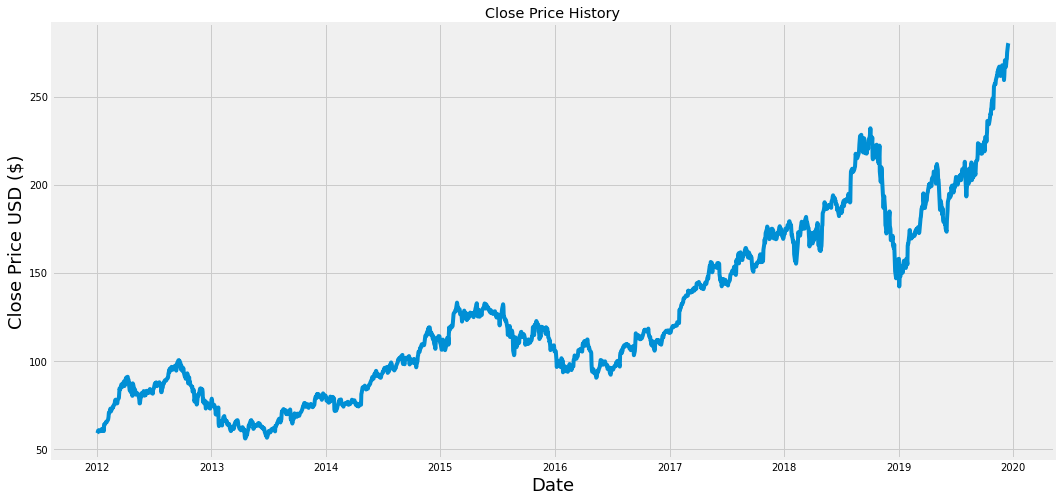

In [0]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dense(units=32))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 64)           16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 119,873
Trainable params: 119,873
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/5
1503/1503 [==============================] - 113s 75ms/step - loss: 7.3080e-04
Epoch 2/5
1503/1503 [==============================] - 109s 73ms/step - loss: 2.7903e-04
Epoch 3/5
1503/1503 [==============================] - 109s 73ms/step - loss: 2.5203e-04
Epoch 4/5
1503/1503 [==============================] - 108s 72ms/step - loss: 1.7654e-04
Epoch 5/5
1503/1503 [==============================] - 109s 72ms/step - loss: 2.0156e-04


TypeError: ignored

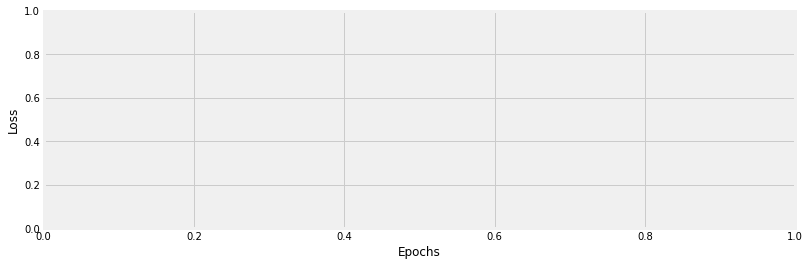

In [0]:
losses_lstm = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(range(len(losses_lstm)),losses_lstm);

In [0]:
#Test data set
test_data = scaled_data[training_data_len - 100: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [0]:
predictions

array([[182.19382],
       [180.55035],
       [180.17793],
       [181.79074],
       [181.15443],
       [182.75635],
       [182.30672],
       [182.91916],
       [182.0091 ],
       [181.67917],
       [180.97784],
       [185.00655],
       [186.32126],
       [187.9085 ],
       [188.28326],
       [187.42746],
       [185.29567],
       [184.91446],
       [186.14485],
       [184.21834],
       [184.7124 ],
       [182.38348],
       [182.72409],
       [179.22218],
       [180.82535],
       [179.50859],
       [179.32234],
       [176.28355],
       [179.41158],
       [178.76183],
       [180.59052],
       [179.85803],
       [182.33269],
       [178.12856],
       [180.3616 ],
       [182.84761],
       [185.60725],
       [184.88647],
       [181.9495 ],
       [185.75323],
       [185.41148],
       [185.02473],
       [185.55878],
       [184.18176],
       [186.07559],
       [185.25316],
       [185.62396],
       [187.13443],
       [189.04108],
       [188.03258],


In [0]:
y_test

array([[186.99000549],
       [186.30999756],
       [187.63000488],
       [187.16000366],
       [188.36000061],
       [188.1499939 ],
       [188.58000183],
       [187.8999939 ],
       [187.5       ],
       [186.86999512],
       [190.24000549],
       [191.83000183],
       [193.30999756],
       [193.97999573],
       [193.46000671],
       [191.69999695],
       [191.22999573],
       [192.27999878],
       [190.69999695],
       [190.80000305],
       [188.83999634],
       [188.74000549],
       [185.69000244],
       [186.5       ],
       [185.46000671],
       [184.91999817],
       [182.16999817],
       [184.42999268],
       [184.16000366],
       [185.5       ],
       [185.11000061],
       [187.17999268],
       [183.91999817],
       [185.3999939 ],
       [187.97000122],
       [190.58000183],
       [190.3500061 ],
       [187.88000488],
       [191.02999878],
       [191.33000183],
       [190.91000366],
       [191.44999695],
       [190.3999939 ],
       [191

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

8.317507837334883

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


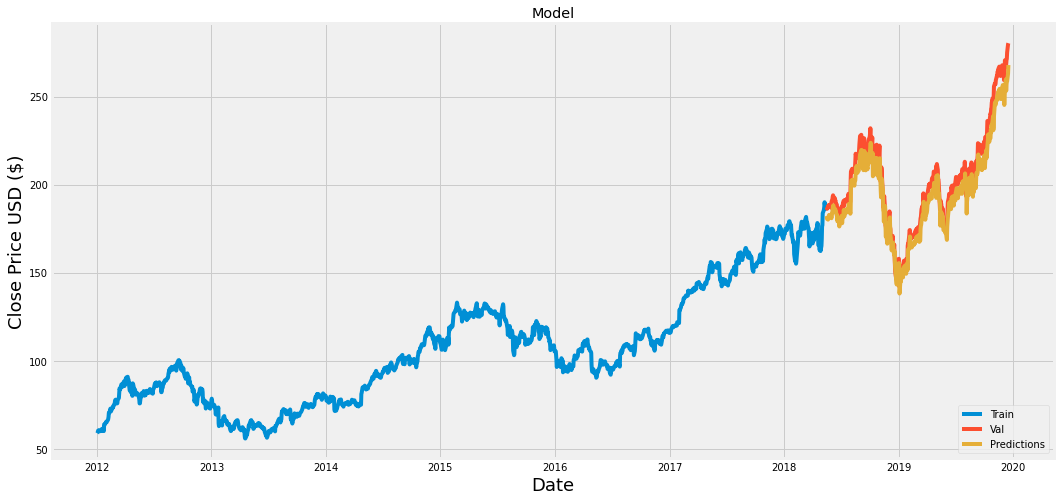

In [0]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,182.193817
2018-05-18,186.309998,180.550354
2018-05-21,187.630005,180.177933
2018-05-22,187.160004,181.790741
2018-05-23,188.360001,181.154434
...,...,...
2019-12-11,270.769989,256.720764
2019-12-12,271.459991,258.371826
2019-12-13,275.149994,258.785889


In [0]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 100 day closing price 
last_100_days = new_df[-100:].values
#Scale the data to be values between 0 and 1
last_100_days_scaled = scaler.transform(last_100_days)
#Create an empty list
X_test = []
#Append the past 100 days
X_test.append(last_100_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[267.12592]]


In [0]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
